# Lecture 5: Logistic Regression and Decision Trees
In the previous lecture, we learned about linear regression, which explores a __linear__ relationship between the independent and dependent variables. In a sense, logistic regression is analogous to linear regression in that it is a generalized linear model. However there are several key differences in logistic regression that makes it very different. Let us explore those differences, and understand how logistic regression works
## Categorical Classification
One key difference between logistic regression and linear regression is that the final output of the logistic regression model is binary, that is, 0 or 1, whereas linear regression has no such property. Thus a logistic regression model will always map from the real number space to a binary space of 0 and 1. Let us examine how logistic regression does this.
### The Logistic Equation
The key underlying equation that underlies the model is the __logistic equation__ and is formulated as below:
![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/5e648e1dd38ef843d57777cd34c67465bbca694f)

In this case, the t in the equation is some linear combination of n variables, or a linear function in an n-dimensional feature space. The formulation of t is therefore identical to the linear regression formula. 

To summarise the logistic equation:
1. Takes an input of n variables
2. Takes a linear combination of the variables as parameter t
3. Using the parameter, outputs a value that always lies between 0 and 1

A visualization of the outputs of the logistic equation is as below (note that this is but one possible output of a logit regression model):
![image](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

### Threshold Value
It's important to realize that the logistic regression should output a __binary__ set of numbers, namely 0 and 1. While the logistic equation does have an output between 0 and 1, the output is continuous. So how do we convert it to 0 and 1?

We use something called a threshold value, such that if the output of the F(x) > threshold, then 1 otherwise, 0. As a general formula:  
![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/aab892e7cf0d00aa6da3aa051335900ff52d12a0)

The threshold value is the epsilon value in the equation, and is a key parameter in logistic regression, because it determines two key characteristics of a logistic regression classifier: 
1. __Sensitivity__
2. __Specificity__


### Sensitivity and Specificity

__The Confusion Matrix__
![image](http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png)

The confusion matrix is a good representation of the predictive power of a logistic regression model.

__Sensitivity__, otherwise known as a __True Positive Rate__, is the proportion of true positives out of the entire pool of "actual positives."   

    The formula is True Positive / ( True Positive + False Negatives )  
    
__Specificity__, otherwise known as a __True Negative Rate__, is the proportion of true negatives out of the entire pool of "actual negatives."   

    The formula is True Negative / ( True Negative + False Positives )
    
It is important to understand that there will always be a trade-off between the two characteristics. This trade-off is best understood in terms of how we set our threshold values

### ROC curve
Let us consider the trivial cases:classify everything as the same value.
If we classify all points as positive, __sensitivity = 1 and specificity = 0__. All positive data points have been classified as positive, along with all the negative data points.  
On the contrary, if everything was classified as negative, __sensitivity = 0 and specificity = 1__ All negative points have been classified correctly. 

Sensitivity __decreases__ as threshold grows, since the predictor will classify more and more positive points incorrectly.
Specificity __increases__ as threhold grows, since the predictor will classify more and more negative points correctly.

This trade-off is represented by the ROC curve, which tells us how good a model performs in terms of specificity and sensitivity.
Sample ROC curve
![image](https://www.statsdirect.com/help/resources/images/ebx_1266835018.gif)

In [10]:
# Preprocess iris to create a binary case 
iris_mod <- iris
iris_mod <- dplyr::mutate(iris_mod, is_setosa = as.numeric(Species=='setosa'))[-5]
print(iris_mod)

# Split train, test
ind <- sample(nrow(iris_mod),0.8*nrow(iris_mod))
train <- iris_mod[ind,]
test <- iris_mod[-ind,]

    Sepal.Length Sepal.Width Petal.Length Petal.Width is_setosa
1            5.1         3.5          1.4         0.2         1
2            4.9         3.0          1.4         0.2         1
3            4.7         3.2          1.3         0.2         1
4            4.6         3.1          1.5         0.2         1
5            5.0         3.6          1.4         0.2         1
6            5.4         3.9          1.7         0.4         1
7            4.6         3.4          1.4         0.3         1
8            5.0         3.4          1.5         0.2         1
9            4.4         2.9          1.4         0.2         1
10           4.9         3.1          1.5         0.1         1
11           5.4         3.7          1.5         0.2         1
12           4.8         3.4          1.6         0.2         1
13           4.8         3.0          1.4         0.1         1
14           4.3         3.0          1.1         0.1         1
15           5.8         4.0          1.

In [11]:
# Use glm function to predict species just with Sepal.Width
fit_logit <- glm(data=train,family=binomial,formula = is_setosa ~ Sepal.Width)
print(summary(fit_logit))


Call:
glm(formula = is_setosa ~ Sepal.Width, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6015  -0.5468  -0.2140   0.2627   1.9871  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -21.228      3.967  -5.351 8.76e-08 ***
Sepal.Width    6.468      1.237   5.227 1.72e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.607  on 119  degrees of freedom
Residual deviance:  78.476  on 118  degrees of freedom
AIC: 82.476

Number of Fisher Scoring iterations: 6




Call:
roc.default(response = test$is_setosa, predictor = pred_logit)

Data: pred_logit in 16 controls (test$is_setosa 0) < 14 cases (test$is_setosa 1).
Area under the curve: 0.6987

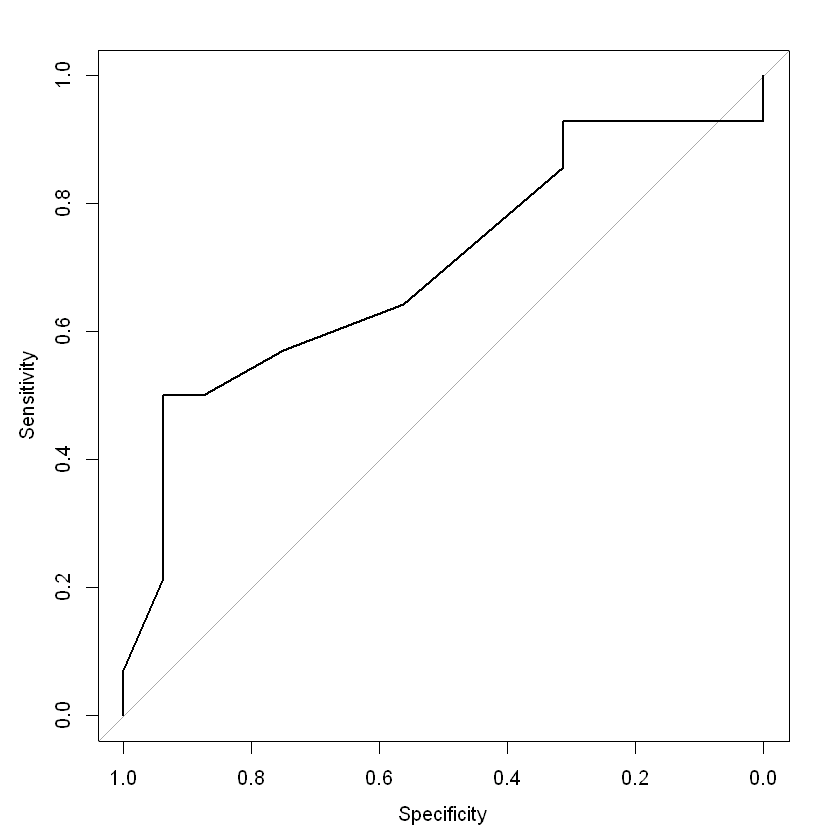

In [14]:
# predict using predict
pred_logit <- predict(object = fit_logit, newdata = test)
# use roc function in pROC library
library(pROC)
roc_curve <- roc(predictor = pred_logit, response=test$is_setosa )
plot(roc_curve)
auc(curve)

### Area Under Curve 
The area under the ROC curve should always be greater and equal to the total proportion of the majority class, since the worse case is classifying everything as one. The closer to 1 the area is, the stronger the model strength

In [15]:
auc(roc_curve)

Area under the curve: 0.6987

# Decision Trees
Linear and logistic regression aren't the only ways to make predications, we can also use a method called cllassifcation and regression trees, or CART.
## CART
CART builds what is called a tree by splitting on the values of the independent variables. To predict the outcome for a new observation or case, you can follow the splits in the tree and at the end, you predict the most frequent outcome in the training set that followed the same path. Some advantages of CART are that it does not assume a linear model, like logistic regression or linear regression, and it's a very to interpret how the model works.

Let's make a simple CART model. We'll be attempting to predict supreme court decisions, as mentioned in lecture.

In [2]:
install.packages("rpart")
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)
TrainCourt = read.csv("resources/TrainCourt.csv")
TestCourt = read.csv("resources/TestCourt.csv")

SupremeCourtTree = rpart(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + 
                         Unconst, data = Train, method="class", minbucket=25)

SyntaxError: invalid syntax (<ipython-input-2-cff4912f83d6>, line 8)

In the above code, we're trying to predict the value of Reverse (whether or not the supreme court will reverse a lower court's decision) using the Circuit, Issue, Petitioner, Respondent, LowerCourt, and Uncost features, all found in the Train dataset.

The minbucket parameter controls how many splits are made in our tree by setting the minimum number of observed data points in each branch of the tree. If it’s too small, overfitting will occur (variance).If it’s too large, model will be too simple and inaccurate (bias). You'll learn more on bias vs. variance in future lectures.

It's very easy to visualize our CART model, and can be done with the prp function. This is one of the reasons CART is more interpretable than Logisitc regression. We can see exactly how it works.


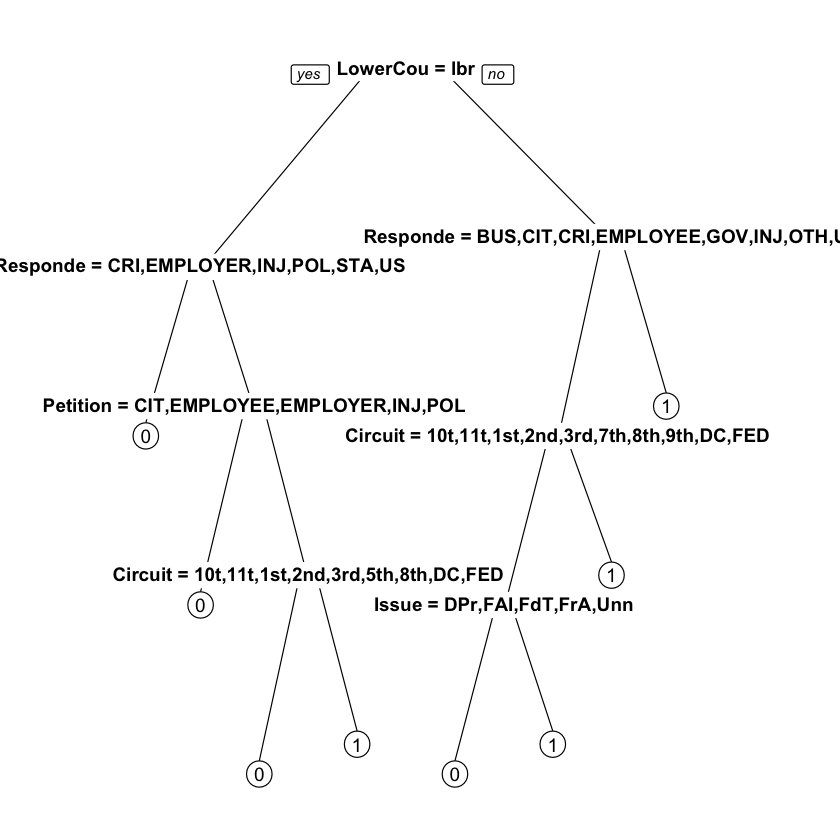

In [8]:
prp(SupremeCourtTree)

The predict() function allows us to apply our model and predict future cases. 

In [16]:
PredictCART = predict(SupremeCourtTree, newdata = TestCourt, type = "class")

## Terms to Review  
1. Logistic Equation / Logistic function
2. Confusion Matrix
3. Sensitivity
4. Specificity